In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [9]:
import os

print(os.getcwd())

C:\Users\saurabh.gaud\Downloads


In [136]:
# for dirname, _, filenames in os.walk(r'C:\Users\saurabh.gaud\Downloads'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [13]:
df=pd.read_csv(r'C:\Users\saurabh.gaud\Downloads\train.csv (1)\train.csv')

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [17]:
df.shape

(550068, 12)

In [19]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [20]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<Axes: >

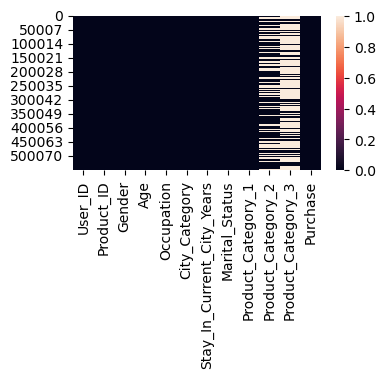

In [32]:
plt.figure(figsize=(4,2))
sns.heatmap(df.isnull())

In [36]:
#checking for duplicates
df.duplicated().sum() 

0

# Changing the names of the columns for better understanding.

In [38]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [39]:
df.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Product_Category_1':'product1',
'Product_Category_2':'product2','Product_Category_3':'product3','Marital_Status':'marital',
            'Stay_In_Current_City_Years':'CurrentCityStay'},inplace=True)

In [40]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'CurrentCityStay', 'marital', 'product1', 'product2', 'product3',
       'Purchase'],
      dtype='object')

In [ ]:
# child, adult , teenage , adult, adult , old , old.

In [41]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
def ages(value): 
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value )
    if '18-25' in value:
        value=value.replace('18-25','teenage')
        return str(value)
    if '26-35' in value:
        value=value.replace('26-35','adult')
        return str(value)
    if '36-45' in value:
        value=value.replace('36-45','adult')
        return str(value) 
    if '46-50' in value:
        value=value.replace('46-50','adult')
        return str(value) 
    if '51-55' in value:
        value=value.replace('51-55','old')
        return str(value) 
    if '55+' in value:
        value=value.replace('55+','old')
        return str(value) 
    
df['Age_Segment']=df['Age'].apply(ages)

In [44]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'CurrentCityStay', 'marital', 'product1', 'product2', 'product3',
       'Purchase', 'Age_Segment'],
      dtype='object')

In [46]:
df['Age_Segment'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [48]:
df[['UserID','marital']].tail()

,UserID,marital
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


In [52]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'CurrentCityStay', 'marital', 'product1', 'product2', 'product3',
       'Purchase', 'Age_Segment'],
      dtype='object')

In [57]:
# Percentage of null data in product2 column
(df['product2'].isnull().sum()*100/df.shape[0]).round(3)

31.567

In [67]:
# df.groupby('Age')['product2'].mode()
s=df.groupby('Age_Segment')['product2'].agg(pd.Series.mode)

In [68]:
s

Age_Segment
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: product2, dtype: float64

In [69]:
df.product2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [71]:
s.index

Index(['adult', 'child', 'old', 'teenage'], dtype='object', name='Age_Segment')

In [76]:
#removing the  null data in product2
for k in s.index:
    df.loc[(df['Age_Segment']==k) & (df['product2'].isnull()), 'product2']=s[k]

In [77]:
df.product2.isnull().sum()

0

In [78]:
#percentage of null data in product3
df.product3.isnull().sum()*100/df.shape[0]

69.67265865311198

In [81]:
t=df.groupby('Age_Segment')['product3'].agg(pd.Series.mode)

In [84]:
for l in t.index:
    df.loc[(df['Age_Segment']==l) & (df['product3'].isnull()), 'product3']=t[l]

In [85]:
df.product3.isnull().sum()

0

In [87]:
df.isnull().sum()

UserID             0
ProductID          0
Gender             0
Age                0
Occupation         0
City_Category      0
CurrentCityStay    0
marital            0
product1           0
product2           0
product3           0
Purchase           0
Age_Segment        0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UserID           550068 non-null  int64  
 1   ProductID        550068 non-null  object 
 2   Gender           550068 non-null  object 
 3   Age              550068 non-null  object 
 4   Occupation       550068 non-null  int64  
 5   City_Category    550068 non-null  object 
 6   CurrentCityStay  550068 non-null  object 
 7   marital          550068 non-null  int64  
 8   product1         550068 non-null  int64  
 9   product2         550068 non-null  float64
 10  product3         550068 non-null  float64
 11  Purchase         550068 non-null  int64  
 12  Age_Segment      550068 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 54.6+ MB


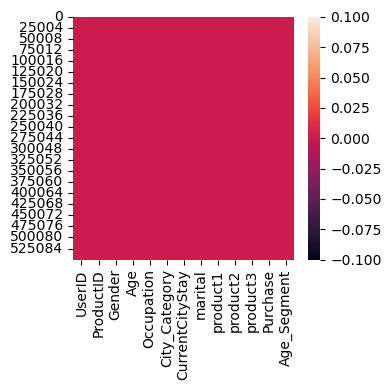

In [95]:
plt.figure(figsize=(4,4))
sns.heatmap(df.isnull())
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Age_Segment vs Purshased'}, xlabel='Age_Segment', ylabel='Purchase'>

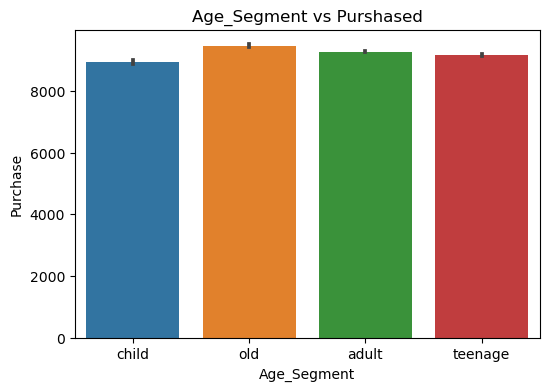

In [100]:
# Age vs Purchase 
plt.figure(figsize=(6,4)) 
plt.title('Age_Segment vs Purshased') 
sns.barplot(x='Age_Segment',y='Purchase', data=df)


In [123]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'CurrentCityStay', 'marital', 'product1', 'product2', 'product3',
       'Purchase', 'Age_Segment'],
      dtype='object')

In [ ]:
#Gender,Age_segment,Occupation,  city category, city, marital, Purchase , Product1 

C:\Users\saurabh.gaud\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


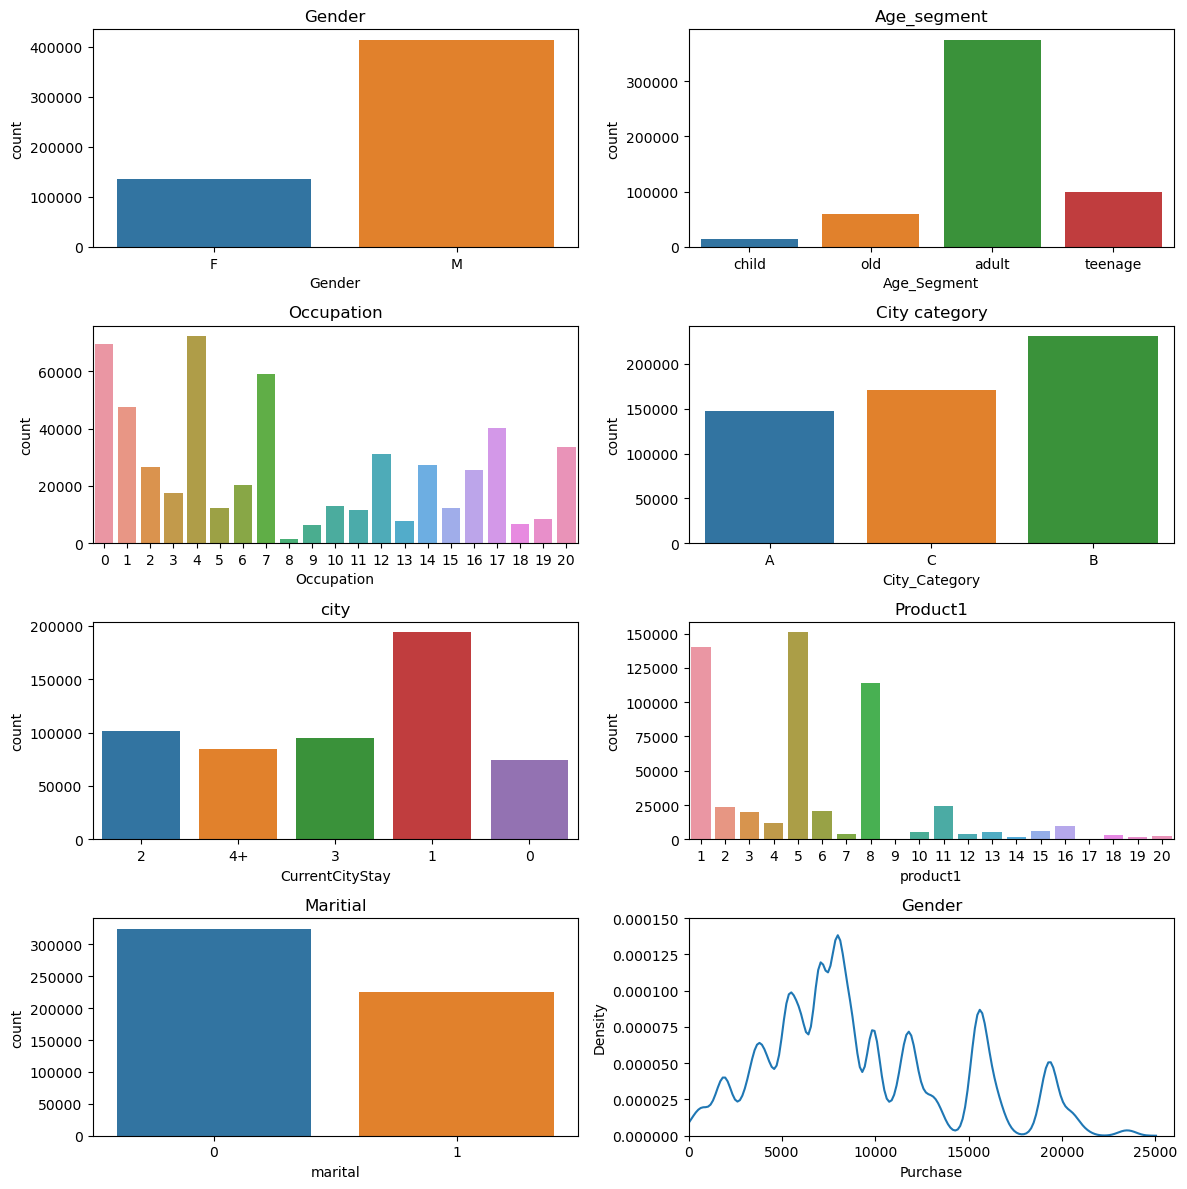

In [126]:
plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender', data=df)


plt.subplot(4,2,2)
plt.title('Age_segment')
sns.countplot(x='Age_Segment', data=df) 


plt.subplot(4,2,3)
plt.title('Occupation')
sns.countplot(x='Occupation', data=df)  


plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(x='City_Category', data=df)  


plt.subplot(4,2,5)
plt.title('city')
sns.countplot(x='CurrentCityStay', data=df)  


plt.subplot(4,2,6)
plt.title('Product1')
sns.countplot(x='product1', data=df)  


plt.subplot(4,2,7)
plt.title('Maritial')
sns.countplot(x='marital', data=df)  


ax=plt.subplot(4,2,8)
plt.title('Gender')
# ax.set_xlimit(0,0.00015)
# ax.set_ylimit(0,26000) 
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(x='Purchase', data=df)  

plt.tight_layout()
# plt.show()


# Gender:-

The graph shows that count of male is more than female.
Male count=4000
Female count=1500

# Age:-

The graph shows that pepople visiting the store are maximum adults.
Adult age ranges from 26-50
Where as least visited are children.

# Maritial:-

People visting the store are married and has higher count as compared to singles.
Married count = 3,00,000
Single count=2,00,000

# Purchase:-

Purchase rate is higher between 5000 - 10,000
Purchase rate goes upto range 25,0000

# City category:-

People visiting the store maximum belong to city category B.
Least visiting people visiting the store belong to category A.

# City:-

Maximum people visiting the store belong to 1.
Least visited is city 0.
By this we can conclude that the store is located in city 1.

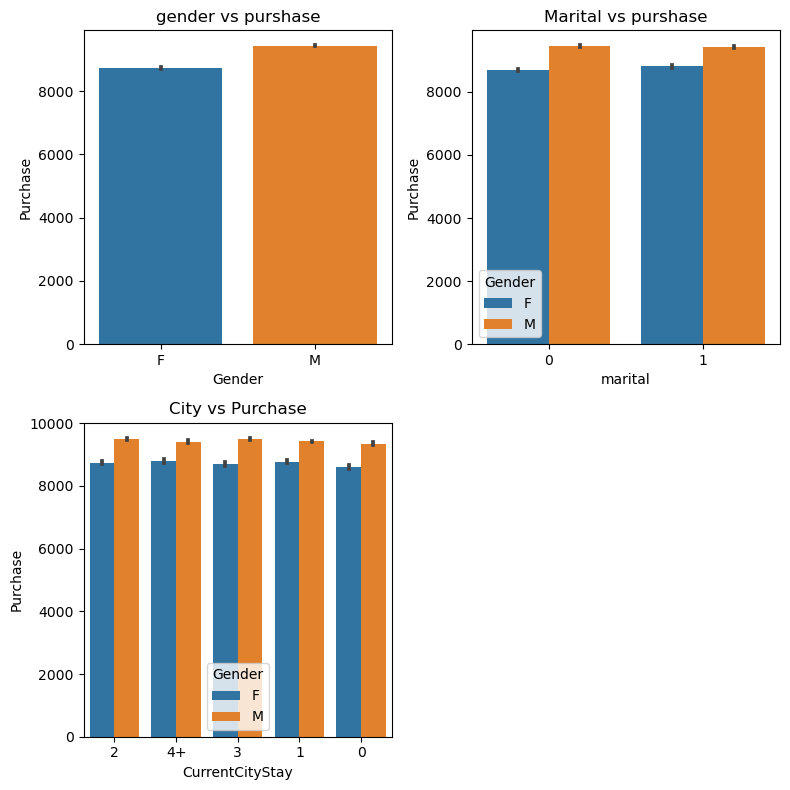

In [135]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('gender vs purshase')
sns.barplot(x='Gender', y='Purchase',data=df) 

plt.subplot(2,2,2)
plt.title('Marital vs purshase')
sns.barplot(x='marital', y='Purchase',hue='Gender',data=df)

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(x='CurrentCityStay', y='Purchase',hue='Gender',data=df)

# plt.subplot(2,2,1)
# plt.title('gender vs purshase')
# sns.barplot(x='Gender', y='Purchase',data=df)

plt.tight_layout()
plt.show()



In [128]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'CurrentCityStay', 'marital', 'product1', 'product2', 'product3',
       'Purchase', 'Age_Segment'],
      dtype='object')